In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '/Users/andishetavakkoli/Documents/notebook/github_project/machine-learning-projects-data/fraud_detection'

In [3]:
df = pd.read_csv(DATA_DIR + '/bs140513_032310.csv')

In [4]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [5]:
df.shape

(594643, 10)

In [6]:
df[df.duplicated() == True]

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud


In [10]:
df['age'].value_counts()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

In [11]:
df['gender'].value_counts()

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

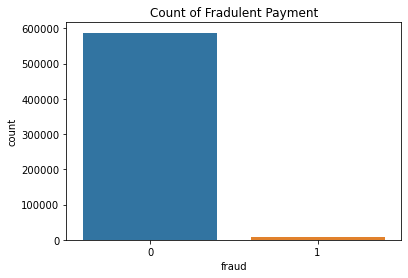

Number of fradulent examples: 7200
Number of normal examples: 587443


In [19]:
df_fraud = df[df['fraud'] == 1]
df_non_fraud = df[df['fraud'] == 0]

sns.countplot(data=df, x='fraud')
plt.title('Count of Fradulent Payment')
plt.show()

print("Number of fradulent examples:", df_fraud['fraud'].count())
print("Number of normal examples:", df_non_fraud['fraud'].count())

In [20]:
df['category'].value_counts()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64

In [23]:
df.groupby('category')['amount', 'fraud'].sum()

/var/folders/rq/68kglm913gz9zwj18qwmq_000000gn/T/ipykernel_44170/2986263282.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('category')['amount', 'fraud'].sum()


,amount,fraud
category,,
'es_barsandrestaurants',276977.04,120
'es_contents',39424.60,0
'es_fashion',423812.51,116
'es_food',973246.41,0
'es_health',2187979.51,1696
'es_home',329022.30,302
'es_hotelservices',358591.25,548
'es_hyper',280327.63,280
'es_leisure',144166.74,474
